# Импорт библиотек

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader.data as pdr
import fix_yahoo_finance as fix
import time

# import pandas_datareader.data as pdr if using the single test below

import tensorflow as tf

fix.pdr_override()

# get_prices


In [76]:
class hist:
    def get_stock_data(ticker, start_date, end_date):
        """
        Gets historical stock data of given tickers between dates
        :param ticker: company, or companies whose data is to fetched
        :type ticker: string or list of strings
        :param start_date: starting date for stock prices
        :type start_date: string of date "YYYY-mm-dd"
        :param end_date: end date for stock prices
        :type end_date: string of date "YYYY-mm-dd"
        :return: stock_data.csv
        """
        i = 1
        try:
            all_data = pdr.get_data_yahoo(ticker, start_date, end_date)
        except ValueError:
            print("ValueError, trying again")
            i += 1
            if i < 5:
                time.sleep(10)
                get_stock_data(ticker, start_date, end_date)
            else:
                print("Tried 5 times, Yahoo error. Trying after 2 minutes")
                time.sleep(120)
                get_stock_data(ticker, start_date, end_date)
        stock_data = all_data["Adj Close"]
        stock_data.to_csv("stock_prices.csv")


    def get_sp500(start_date, end_date):
        """
        Gets sp500 price data
        :param start_date: starting date for sp500 prices
        :type start_date: string of date "Y-m-d"
        :param end_date: end date for sp500 prices
        :type end_date: string of date "Y-m-d"
        :return: sp500_data.csv
        """
        i = 1
        try:
            sp500_all_data = pdr.get_data_yahoo("SPY", start_date, end_date)
        except ValueError:
            print("ValueError, trying again")
            i += 1
            if i < 5:
                time.sleep(10)
                get_stock_data(start_date, end_date)
            else:
                print("Tried 5 times, Yahoo error. Trying after 2 minutes")
                time.sleep(120)
                get_stock_data(start_date, end_date)
        sp500_data = sp500_all_data["Adj Close"]
        sp500_data.to_csv("sp500_data.csv")


    if __name__ == "__main__":
        get_stock_data("AAPL", "2018-05-01", "2018-06-01")
        # get_sp500("2018-05-01", "2018-06-01")

[*********************100%***********************]  1 of 1 downloaded


# preprocessing


In [77]:
class DataProcessing:
    def __init__(self, file, train):
        self.file = pd.read_csv(file)
        self.train = train
        self.i = int(self.train * len(self.file))
        self.stock_train = self.file[0: self.i]
        self.stock_test = self.file[self.i:]
        self.input_train = []
        self.output_train = []
        self.input_test = []
        self.output_test = []

    def gen_train(self, seq_len):
        """
        Generates training data
        :param seq_len: length of window
        :return: X_train and Y_train
        """
        for i in range((len(self.stock_train)//seq_len)*seq_len - seq_len - 1):
            x = np.array(self.stock_train.iloc[i: i + seq_len, 1])
            y = np.array([self.stock_train.iloc[i + seq_len + 1, 1]], np.float64)
            self.input_train.append(x)
            self.output_train.append(y)
        self.X_train = np.array(self.input_train)
        self.Y_train = np.array(self.output_train)

    def gen_test(self, seq_len):
        """
        Generates test data
        :param seq_len: Length of window
        :return: X_test and Y_test
        """
        for i in range((len(self.stock_test)//seq_len)*seq_len - seq_len - 1):
            x = np.array(self.stock_test.iloc[i: i + seq_len, 1])
            y = np.array([self.stock_test.iloc[i + seq_len + 1, 1]], np.float64)
            self.input_test.append(x)
            self.output_test.append(y)
        self.X_test = np.array(self.input_test)
        self.Y_test = np.array(self.output_test)

# MLP_model


In [78]:
# start = "2003-01-01"
# end = "2018-01-01"

# hist.get_stock_data("AAPL", start_date=start, end_date=end)
# process = DataProcessing("stock_prices.csv", 0.9)
# process.gen_test(10)
# process.gen_train(10)

# X_train = process.X_train / 20
# Y_train = process.Y_train / 20

# X_test = process.X_test / 20
# Y_test = process.Y_test / 20

# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(100, activation=tf.nn.relu))
# model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

# model.compile(optimizer="adam", loss="mean_squared_error", metrics='accuracy')

# abc = model.fit(X_train, Y_train, epochs=100, verbose=0)

# print(model.evaluate(X_test, Y_test))

# # If instead of a full backtest, you just want to see how accurate the model is for a particular prediction, run this:
# # data = pdr.get_data_yahoo("AAPL", "2017-12-19", "2018-01-03")
# # stock = data["Adj Close"]
# # X_predict = np.array(stock).reshape((1, 10)) / 200
# # print(model.predict(X_predict)*200)

# LSTM_model

In [79]:
start = "2003-01-01"
end = "2018-01-01"

hist.get_stock_data("AAPL", start_date=start, end_date=end)
process = DataProcessing("stock_prices.csv", 0.9)

sq_le = 10

process.gen_test(sq_le)
process.gen_train(sq_le)

X_train = process.X_train.reshape((3379, sq_le, 1)) / 200
Y_train = process.Y_train / 200

X_test = process.X_test.reshape(359, sq_le, 1) / 200
Y_test = process.Y_test / 200

[*********************100%***********************]  1 of 1 downloaded


In [80]:
print(X_train[0])
print(Y_train[0])

[[0.00113823]
 [0.00114592]
 [0.00114592]
 [0.00114208]
 [0.001119  ]
 [0.001129  ]
 [0.00113207]
 [0.00112516]
 [0.00112362]
 [0.00110978]]
[0.00108439]


In [81]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(20, input_shape=(10, 1), return_sequences=True))
model.add(tf.keras.layers.LSTM(20))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu6))

model.compile(optimizer="adam", loss="mean_squared_error", metrics='accuracy')

abc = model.fit(X_train, Y_train, epochs=50, verbose=0)

print()
print(model.evaluate(X_train, Y_train))
print()
print(model.evaluate(X_test, Y_test))

# data = pdr.get_data_yahoo("AAPL", "2017-12-19", "2018-01-03")
# stock = data["Adj Close"]
# X_predict = np.array(stock).reshape((1, 10, 1)) / 200

# print(model.predict(X_predict)*200)

# If instead of a full backtest, you just want to see how accurate the model is for a particular prediction, run this:
# data = pdr.get_data_yahoo("AAPL", "2017-12-19", "2018-01-03")
# stock = data["Adj Close"]
# X_predict = np.array(stock).reshape((1, 10)) / 200
# print(model.predict(X_predict)*200)


106/106 [==============================] - 2s 3ms/step - loss: 4.5280e-06 - accuracy: 0.0000e+00
[4.528036242845701e-06, 0.0]

12/12 [==============================] - 0s 3ms/step - loss: 1.2244e-05 - accuracy: 0.0000e+00
[1.224449988512788e-05, 0.0]


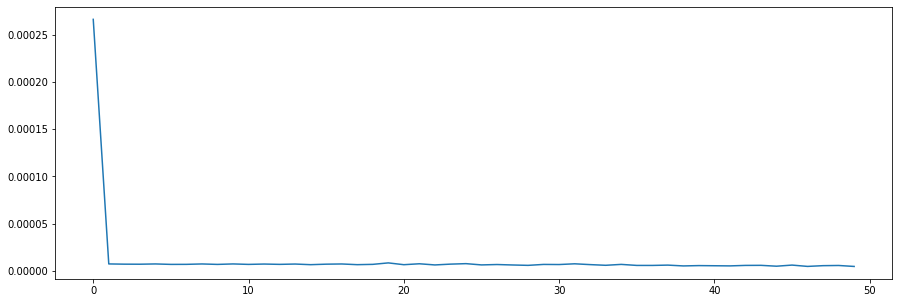

In [86]:
plt.figure(figsize=(15,5))
plt.plot(abc.history['loss'])
plt.show()

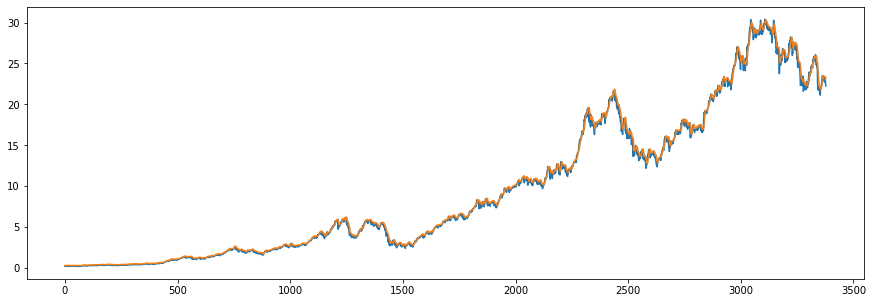

In [83]:
prx = model.predict(X_train)
pd.concat([pd.DataFrame(Y_train), pd.DataFrame(prx)], 1)
plt.figure(figsize=(15,5))
plt.plot(Y_train*200)
plt.plot(prx*200)

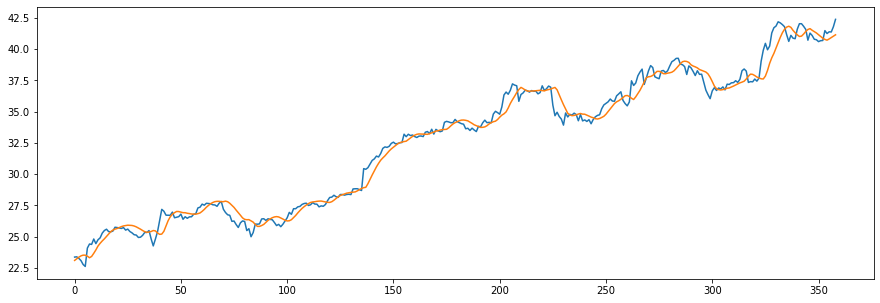

In [84]:
prx = model.predict(X_test)
pd.concat([pd.DataFrame(Y_test), pd.DataFrame(prx)], 1)
plt.figure(figsize=(15,5))
plt.plot(Y_test*200)
plt.plot(prx*200)

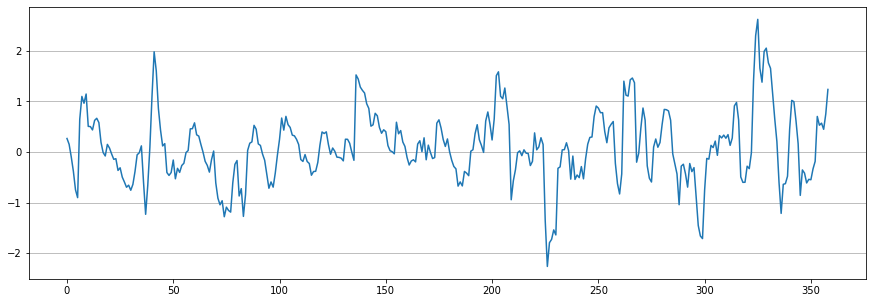

In [85]:
plt.figure(figsize=(15,5))
plt.plot(Y_test*200-prx*200)
plt.grid(axis = 'y')